# Задание: скользящие средние на биржевых графиках

Используя данные индекса РТС за последние годы

https://video.ittensive.com/python-advanced/rts-index.csv

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 8)


def to_date(value: str):
    d, m, y = value.split('.')
    return pd.to_datetime(y + '-' + m + '-' + d)


data = pd.read_csv('https://video.ittensive.com/python-advanced/rts-index.csv')
data['Date'] = data['Date'].map(to_date)
data = data.set_index('Date')
data.head()

,Open,Max,Min,Close,"Trading Volume, USD","Market Capitalization, USD",Unnamed: 7
Date,,,,,,,
2019-11-18,1456.17,1461.20,1436.74,1443.02,9.016255e+08,1.799203e+11,NaN
2019-11-15,1440.29,1450.84,1435.54,1449.42,8.869229e+08,1.807188e+11,NaN
2019-11-14,1438.67,1448.54,1425.44,1436.98,1.149759e+09,1.791677e+11,NaN
2019-11-13,1443.19,1443.19,1430.91,1437.85,8.875070e+08,1.792759e+11,NaN
2019-11-12,1461.37,1471.19,1447.83,1449.35,9.772689e+08,1.807094e+11,NaN


постройте **отдельные графики закрытия (Close)** индекса по дням **за 2017, 2018, 2019 годы** в единой оси X.

Добавьте на график **экспоненциальное среднее за 20 дней для значения Max за 2017 год**.

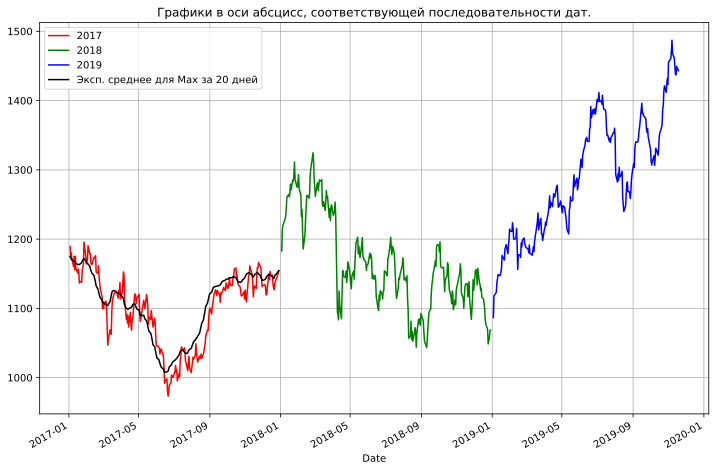

In [2]:
data['Close']['2017'].plot(color='red', label='2017')
data['Close']['2018'].plot(color='green', label='2018')
data['Close']['2019'].plot(color='blue', label='2019')

data['Max']['2017'].ewm(span=20).mean().plot(color='black', label='Эксп. среднее для Max за 20 дней')
plt.title('Графики в оси абсцисс, соответствующей последовательности дат.')
plt.legend()
plt.grid(True);

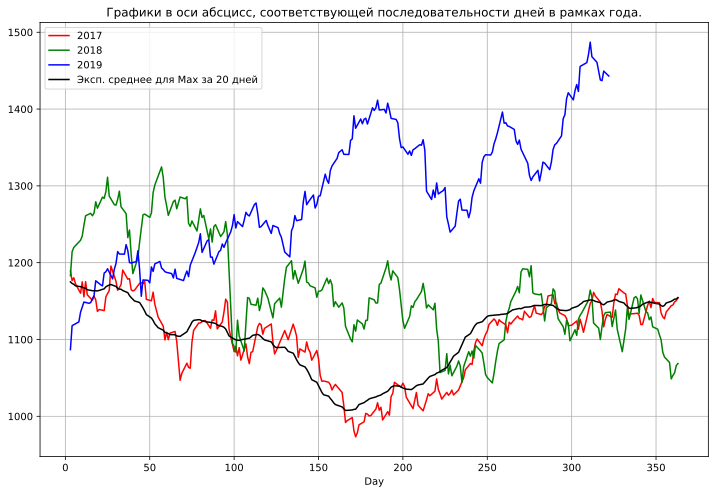

In [3]:
def to_day_as_index(df: pd.DataFrame, price_type: str, year: str) -> pd.DataFrame:
    new_df = df[price_type][year].reset_index()
    new_df['Day'] = new_df['Date'].dt.dayofyear
    new_df = new_df.set_index('Day')
    return new_df


data_2017 = to_day_as_index(data, 'Close', '2017')['Close']
data_2017.plot(color='red', label='2017')

data_2018 = to_day_as_index(data, 'Close', '2018')['Close']
data_2018.plot(color='green', label='2018')

data_2019 = to_day_as_index(data, 'Close', '2019')['Close']
data_2019.plot(color='blue', label='2019')


data_ewm_2017 = to_day_as_index(data, 'Max', '2017')['Max'].ewm(span=20).mean()
data_ewm_2017.plot(color='black', label='Эксп. среднее для Max за 20 дней')

plt.title('Графики в оси абсцисс, соответствующей последовательности дней в рамках года.')
plt.legend()
plt.grid(True);

**Найдите последнюю дату**, когда экспоненциальное среднее максимального дневного значения (Max) в 2017 году было больше, чем соответствующее значение Close в 2019 году (это последнее пересечение графика за 2019 год и графика для среднего за 2017 год).

In [4]:
united_df = pd.merge(data_ewm_2017, to_day_as_index(data, 'Close', '2019'), left_index=True, right_index=True)
united_df[united_df['Max'] > united_df['Close']].sort_index(ascending=False).iloc[0, :]['Date']

Timestamp('2019-01-17 00:00:00')

После какого дня 2019 года индекс РТС по закрытию окончательно превысил максимальные показатели за аналогичный день 2017 года?

,Date,Close
Day,,
45,2019-02-14,1156.31
46,2019-02-15,1177.50
49,2019-02-18,1177.04
50,2019-02-19,1173.64


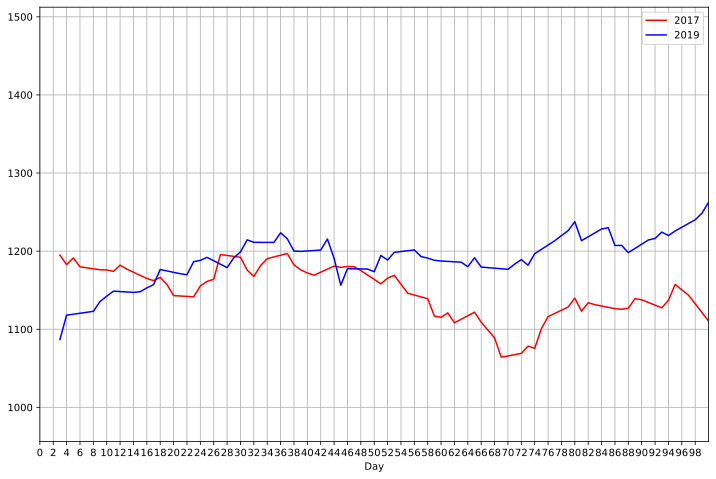

In [5]:
data_2017 = to_day_as_index(data, 'Max', '2017')['Max']
data_2017.plot(color='red', label='2017')

data_2019.plot(color='blue', label='2019')

plt.legend()
plt.grid(True)
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 2));

to_day_as_index(data, 'Close', '2019').sort_index().loc[45:50, :]